In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def histogram_equalization(image):
    if len(image.shape) == 3:  # Check if image is color
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    else:
        gray = image  # Already grayscale
    
    equalized = cv2.equalizeHist(gray)  # Apply histogram equalization
    return gray, equalized




In [73]:
def match_histogram(source, reference):
    source_hist, _ = np.histogram(source.flatten(), 256, [0, 256])
    reference_hist, _ = np.histogram(reference.flatten(), 256, [0, 256])
    
    # Compute CDFs
    source_cdf = np.cumsum(source_hist) / np.sum(source_hist)
    reference_cdf = np.cumsum(reference_hist) / np.sum(reference_hist)
    
    # Create a mapping (LUT) from source to reference CDF
    lut = np.interp(source_cdf, reference_cdf, np.arange(256))
    
    # Apply LUT transformation
    modified_image = cv2.LUT(source, lut.astype(np.uint8))
    
    return modified_image

In [74]:
input_image = cv2.imread('2.jpg')  # Load input image
reference_image = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)

In [75]:
gray_image, equalized_image = histogram_equalization(input_image)
gray_image2, equalized_image2 = histogram_equalization(reference_image)
matched_image = match_histogram(gray_image, gray_image2)

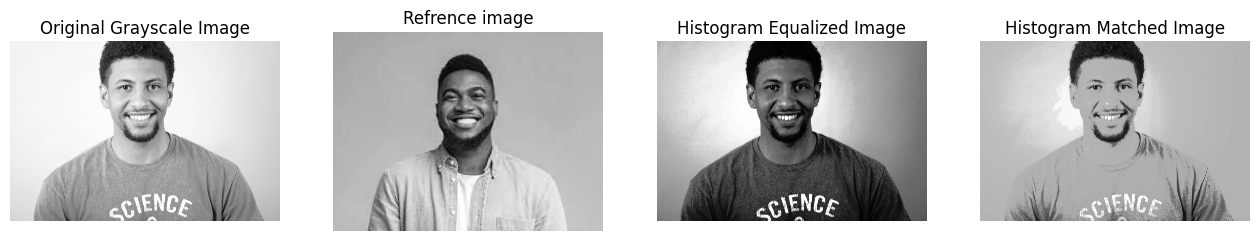

In [76]:

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis("off")

axes[1].imshow(gray_image2, cmap='gray')
axes[1].set_title("Refrence image")
axes[1].axis("off")

axes[2].imshow(equalized_image, cmap='gray')
axes[2].set_title("Histogram Equalized Image")
axes[2].axis("off")

axes[3].imshow(matched_image, cmap='gray')
axes[3].set_title("Histogram Matched Image")
axes[3].axis("off")

plt.show()
